In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<AxesSubplot:xlabel='count', ylabel='domain'>

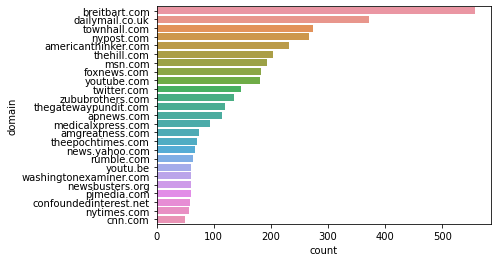

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<AxesSubplot:xlabel='count', ylabel='posted_by'>

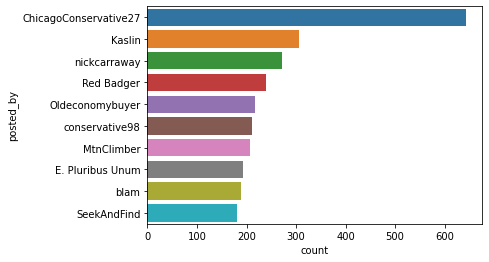

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

domain         \
                                              count unique   
domain                 posted_by                             
americanthinker.com    Kaslin                    80      1   
                       MtnClimber                92      1   
                       SeekAndFind               41      1   
                       blam                       1      1   
amgreatness.com        MtnClimber                55      1   
                       E. Pluribus Unum           1      1   
                       Red Badger                 5      1   
apnews.com             ChicagoConservative27      1      1   
                       Oldeconomybuyer           81      1   
                       conservative98             1      1   
                       nickcarraway               3      1   
breitbart.com          SeekAndFind                2      1   
                       blam                      18      1   
                       E. Pluribus Unum          11      1   
                       Red Badger                 3      1   
                       ChicagoConservative27    318      1   
                       conservative98            36      1   
cnn.com                ChicagoConservative27      8      1   
                       Oldeconomybuyer            1      1   
                       conservative98             5      1   
dailymail.co.uk        SeekAndFind                1      1   
                       Red Badger                 2      1   
                       conservative98             8      1   
                       nickcarraway               2      1   
foxnews.com            Kaslin                     1      1   
                       E. Pluribus Unum           2      1   
                       Red Badger                 4      1   
                       ChicagoConservative27     26      1   
                       Oldeconomybuyer            4      1   
                       conservative98            38      1   
                       nickcarraway               4      1   
msn.com                SeekAndFind                1      1   
                       E. Pluribus Unum           1      1   
                       Red Badger                 4      1   
                       Oldeconomybuyer           20      1   
                       nickcarraway               5      1   
news.yahoo.com         SeekAndFind                1      1   
                       ChicagoConservative27      1      1   
                       Oldeconomybuyer           17      1   
                       conservative98             3      1   
                       nickcarraway               5      1   
newsbusters.org        Red Badger                 1      1   
nypost.com             MtnClimber                 1      1   
                       SeekAndFind                2      1   
                       E. Pluribus Unum           2      1   
                       Red Badger                 3      1   
                       ChicagoConservative27     54      1   
                       Oldeconomybuyer            7      1   
                       conservative98            31      1   
                       nickcarraway              46      1   
nytimes.com            SeekAndFind                1      1   
                       E. Pluribus Unum           1      1   
pjmedia.com            MtnClimber                 1      1   
                       SeekAndFind               17      1   
                       E. Pluribus Unum          12      1   
                       conservative98             1      1   
rumble.com             E. Pluribus Unum           1      1   
                       Red Badger                 1      1   
                       conservative98             9      1   
theepochtimes.com      SeekAndFind               26      1   
                       E. Pluribus Unum           9      1   
                       Red Badger                 3      1   
thegatewaypundi

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

,timestamp,replies
title,,
"JUST IN - U.S. Supreme Court has voted to strike down Roe vs. Wade, an initial draft majority opinion by Justice Alito shows.",2022-05-03 02:30:14,272.0
What is your favorite song that actually tells a story?,2022-04-23 00:13:04,270.0
Mark Levin says conservatives who oppose intervention in Ukraine actually “hate America”,2022-04-25 03:24:59,241.0
What is the worst movie you have ever seen?Please post clip and/or imdb listing,2022-04-21 17:19:36,178.0
Russia orders Ukrainian forces in Mariupol to surrender by Sunday morning,2022-04-17 04:54:54,155.0
